In [2]:
!pip install wordcloud

# import all necessary libraries
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split # so we can split our train and test data
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, classification_report
from sklearn.metrics import confusion_matrix # for evalluation
import matplotlib.pyplot as plt
import seaborn as sns

# read the entire CSV file containing all business reviews into a dataframe
yelp_reviews = pd.read_csv('yelp_reviews_RV_categories.csv')

# print first few rows of dataframe
print(yelp_reviews.head())



              business_id                name      address           city  \
0  25Uww0C0wvF9CZ_3B6vWtA  Enjoy The Mountain  1 Garden St  Santa Barbara   
1  25Uww0C0wvF9CZ_3B6vWtA  Enjoy The Mountain  1 Garden St  Santa Barbara   
2  25Uww0C0wvF9CZ_3B6vWtA  Enjoy The Mountain  1 Garden St  Santa Barbara   
3  25Uww0C0wvF9CZ_3B6vWtA  Enjoy The Mountain  1 Garden St  Santa Barbara   
4  25Uww0C0wvF9CZ_3B6vWtA  Enjoy The Mountain  1 Garden St  Santa Barbara   

  state postal_code   latitude   longitude  stars  \
0    CA       93105  34.414342 -119.687332    4.5   
1    CA       93105  34.414342 -119.687332    4.5   
2    CA       93105  34.414342 -119.687332    4.5   
3    CA       93105  34.414342 -119.687332    4.5   
4    CA       93105  34.414342 -119.687332    4.5   

                                          attributes  \
0  {'WheelchairAccessible': 'True', 'BikeParking'...   
1  {'WheelchairAccessible': 'True', 'BikeParking'...   
2  {'WheelchairAccessible': 'True', 'BikeParking'.

In [3]:
# prepare data

# Drop rows with missing values in 'text' and 'stars' columns
yelp_reviews.dropna(subset=['text', 'stars'], inplace=True)

# extract text --> text; and target var --> stars from dataframe
X = yelp_reviews['text']
y = yelp_reviews['stars']

# convert continues star ratings into categories (pos, neutral, neg)
# the categorical labels are subjective and were chosen somewhat arbitrarily
def categorize_rating(rating):
    if rating < 3.5:
        return 'negative'
    elif rating == 3.5:
        return 'neutral'
    else:
        return 'positive'

# Apply categorize_rating function to target var to translate data
y_categorical = y.apply(categorize_rating)

# Split the data into training and test sets (80/20)
X_train, X_test, y_train, y_test = train_test_split(X, y_categorical, test_size=0.2, random_state=42)

In [4]:
# reference for how to use TF-IDF: https://www.capitalone.com/tech/machine-learning/scikit-tfidf-implementation/
# Initialize TF-IDF vectorizer
tfidf_vectorizer = TfidfVectorizer()

# Fit and transform training data
X_train_tfidf = tfidf_vectorizer.fit_transform(X_train)

# Transform test data
X_test_tfidf = tfidf_vectorizer.transform(X_test)

# reference for how to use Multinomail NBL: https://scikit-learn.org/stable/modules/generated/sklearn.naive_bayes.MultinomialNB.html
# Initialize the Naive Bayes classifier
nb_classifier = MultinomialNB()

# Train the classifier
nb_classifier.fit(X_train_tfidf, y_train)

MultinomialNB()


Test Accuracy: 0.5937304075235109
Test Precision: 0.6644410138017879
Test Recall: 0.5937304075235109
Test F1-score: 0.5544412859055704

Classification Report (Test Data):
              precision    recall  f1-score   support

    negative       0.54      0.94      0.69       707
     neutral       0.71      0.34      0.46       399
    positive       0.80      0.30      0.44       489

    accuracy                           0.59      1595
   macro avg       0.68      0.53      0.53      1595
weighted avg       0.66      0.59      0.55      1595



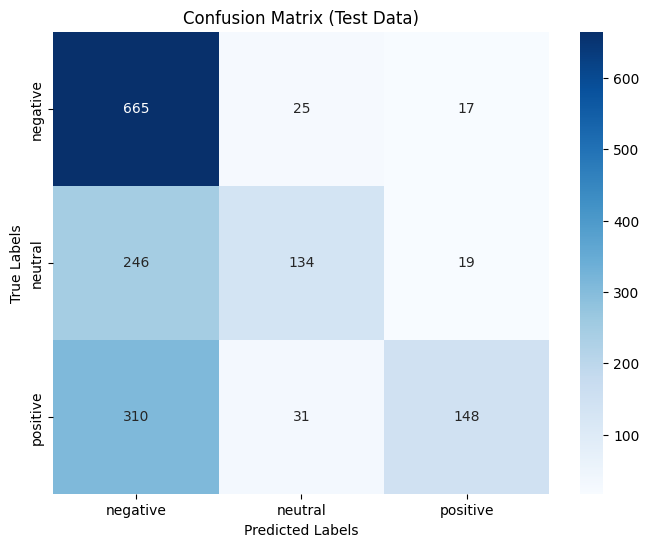


Confusion Matrix:
[[665  25  17]
 [246 134  19]
 [310  31 148]]


In [5]:

# Predict sentiment (pos, neutral, neg) for test data
y_test_pred = nb_classifier.predict(X_test_tfidf)

# Evaluate the model on test data using accuracy, precision, recall, and F1
accuracy = accuracy_score(y_test, y_test_pred)
precision = precision_score(y_test, y_test_pred, average='weighted')
recall = recall_score(y_test, y_test_pred, average='weighted')
f1 = f1_score(y_test, y_test_pred, average='weighted')
print("\nTest Accuracy:", accuracy)
print("Test Precision:", precision)
print("Test Recall:", recall)
print("Test F1-score:", f1)

# Generate classification report for test data
print("\nClassification Report (Test Data):")
print(classification_report(y_test, y_test_pred))

# Define the categorical labels
labels = ['negative', 'neutral', 'positive']

# Generate confusion matrix for test data
conf_matrix = confusion_matrix(y_test, y_test_pred, labels=labels)

# Plot the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, cmap='Blues', fmt='g', xticklabels=labels, yticklabels=labels)
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix (Test Data)')
plt.show()

# print confusion matrix for test data w/out heat map
print("\nConfusion Matrix:")
print(conf_matrix)

In [6]:
import numpy as np
import string
from sklearn.feature_extraction.text import TfidfVectorizer

# Define preprocess_text function for text preprocessing
def preprocess_text(text):
    # Remove punctuation
    text = text.translate(str.maketrans('', '', string.punctuation))
    # Make lowercase the text
    text = text.lower()
    return text

# Sample a random review from the dataset
sample_review_index = np.random.randint(len(X_test))
sample_review = X_test.iloc[sample_review_index]
sample_true_label = y_test.iloc[sample_review_index]

# Preprocess the sample review
preprocessed_review = preprocess_text(sample_review)

# Initialize TF-IDF vectorizer
tfidf_vectorizer_sample = TfidfVectorizer(vocabulary=tfidf_vectorizer.vocabulary_)

# Transform the sample review using the TF-IDF vectorizer
sample_review_tfidf = tfidf_vectorizer_sample.fit_transform([preprocessed_review])

# Predict the sentiment of the sample review
sample_pred_label = nb_classifier.predict(sample_review_tfidf)[0]

# Print out the sampled review text, true label, and predicted label
print("Sampled Review:")
print(sample_review)
print("\nTrue Label:", sample_true_label)
print("Predicted Label:", sample_pred_label)

Sampled Review:
He does great work.   Will work with your schedule.   Very honest and reliable and knowledgeable.  I would recommend him for any of your automotive repair needs!!!

True Label: positive
Predicted Label: negative


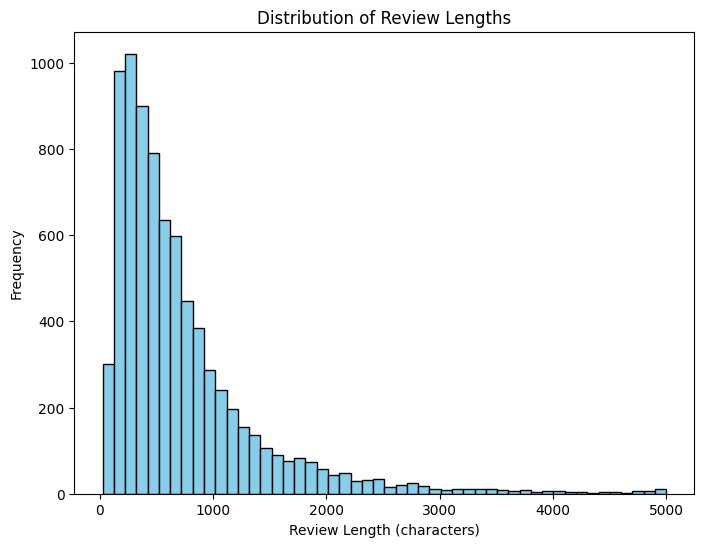

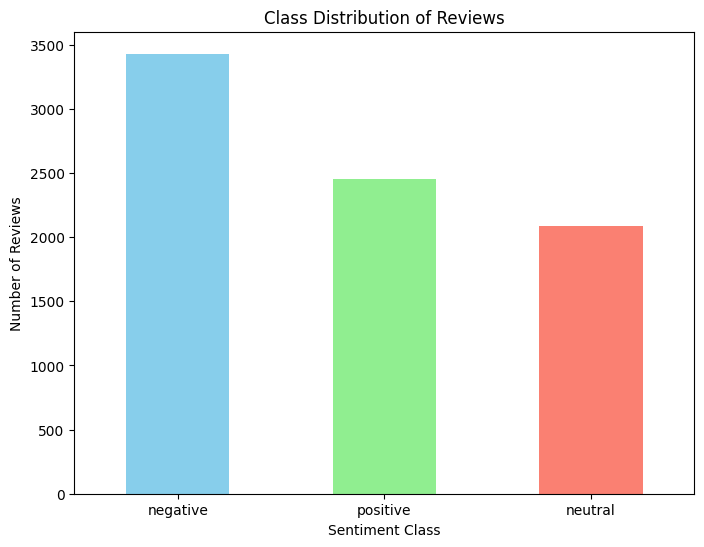

In [7]:
# Histogram of Review Lengths
review_lengths = X.str.len()
plt.figure(figsize=(8, 6))
plt.hist(review_lengths, bins=50, color='skyblue', edgecolor='black')
plt.xlabel('Review Length (characters)')
plt.ylabel('Frequency')
plt.title('Distribution of Review Lengths')
plt.show()

# Bar Plot of Class Distribution
class_counts = y_categorical.value_counts()
plt.figure(figsize=(8, 6))
class_counts.plot(kind='bar', color=['skyblue', 'lightgreen', 'salmon'])
plt.xlabel('Sentiment Class')
plt.ylabel('Number of Reviews')
plt.title('Class Distribution of Reviews')
plt.xticks(rotation=0)
plt.show()

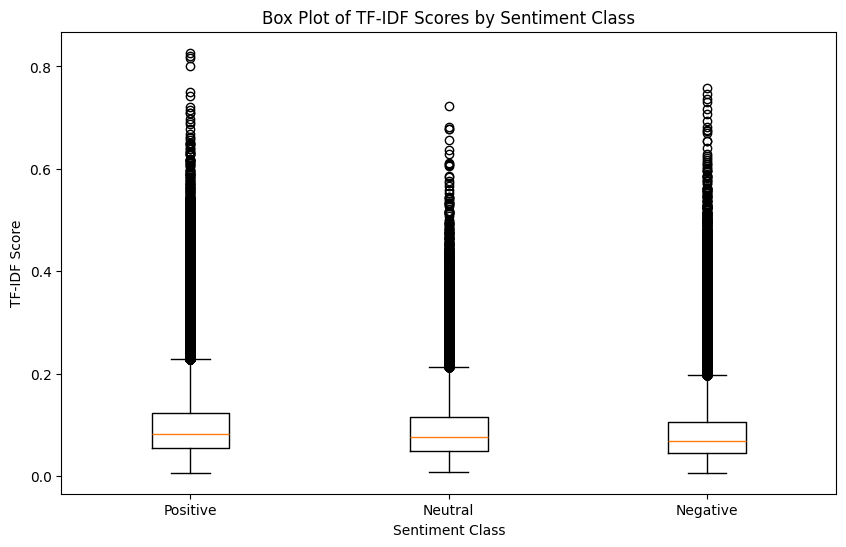

In [8]:
import pandas as pd
from sklearn.feature_extraction.text import TfidfVectorizer
import matplotlib.pyplot as plt

# Separate reviews by sentiment class
positive_reviews = yelp_reviews[yelp_reviews['stars'] > 3]
neutral_reviews = yelp_reviews[yelp_reviews['stars'] == 3]
negative_reviews = yelp_reviews[yelp_reviews['stars'] < 3]

# Initialize the TF-IDF vectorizer
tfidf_vectorizer = TfidfVectorizer()

# Fit and transform the text data for each sentiment class
X_positive = tfidf_vectorizer.fit_transform(positive_reviews['text'])
X_neutral = tfidf_vectorizer.fit_transform(neutral_reviews['text'])
X_negative = tfidf_vectorizer.fit_transform(negative_reviews['text'])

# Extract TF-IDF scores for each sentiment class
tfidf_scores_positive = X_positive.data
tfidf_scores_neutral = X_neutral.data
tfidf_scores_negative = X_negative.data

# Create box plots to visualize the distribution of TF-IDF scores
plt.figure(figsize=(10, 6))
plt.boxplot([tfidf_scores_positive, tfidf_scores_neutral, tfidf_scores_negative],
            labels=['Positive', 'Neutral', 'Negative'])
plt.title('Box Plot of TF-IDF Scores by Sentiment Class')
plt.xlabel('Sentiment Class')
plt.ylabel('TF-IDF Score')
plt.show()


In [9]:
# EVALUATE RESULTS
# 665 instances with a true label of negative sentiment were also pred. neg
# so, our model has the most success with predicting negative reviews. This
# makes sense as when people go to write a bad review, they're usually
# pretty clear and aggressive.

# 148 instances with a true label of pos sent. and predicted pos
# significant decrease, but theres less than 200 total for positive

# 134 instances for neutral, but again, sub 200

# we have an overall test accuracy of 59.37%
# 66.44% precision measure which measures the true positive predictions

# test recall or sensitivity measures the proportion of true positive preds
# among all actual pos instances - 0.59

# f1 score is a balance of preciion and recall so here we have 55.44

# for the pos class, precision is highest
# for neutral class, preciison is highest
# for negative, recall is highest

# so, our model has the most trouble predicitng the neutral class. Which makes
# sense, they're sometimes painfully neutral. We know this from precision
# for neutral class is only 71% and recall is 34% with the lowest F1.

# how to mitigate this? balance the dataset - fewer instances of neutral
# ratings, so there may be data sparcity. 